## **Assignment 11**

Predict type of animal based on height and weight.

**Assignment Requirements:**

- Use the following dataset for your assignment today: Link
- Create a Decision Tree Classifier model on your training data.
- Report your results on the test data.
- Report the precision, recall, and accuracy of your training and test sets.
- Try some of the preprocessing techniques learned last week where applicable to improve your model.
- Plot your Decision Tree at the end of your notebook showing the tree you created.
- Submit your notebook to the Learn platform when finished.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree 
import seaborn as sns
sns.set_palette('rocket_r')
sns.set_style('white')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
# read data from the driver csv file
URL = 'https://drive.google.com/file/d/1p-0OicAm-AMFeCdaM9G53gai4Fqsqy1P/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df.head()

,Unnamed: 0,height,weight,target,type
0,0,27.0,71.0,0.0,dog
1,1,27.0,92.0,0.0,dog
2,2,32.0,47.0,0.0,dog
3,3,30.0,90.0,0.0,dog
4,4,28.0,91.0,0.0,dog


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   height      200 non-null    float64
 2   weight      200 non-null    float64
 3   target      200 non-null    float64
 4   type        200 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


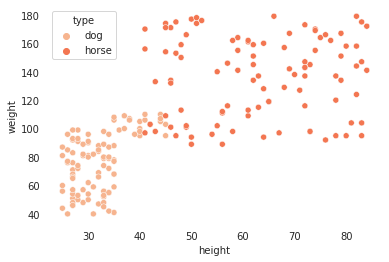

In [ ]:
# as we see in the scatterplot there are two separated group

sns.scatterplot(data = df, x = 'height', y='weight',hue='type')
sns.despine(bottom = True, left = True);

In [ ]:
# split data

X = df[['height','weight']]
y = df[['target']]
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42)

In [ ]:
# baseline model 
y_train.target.value_counts(normalize=True)

1.0    0.514925
0.0    0.485075
Name: target, dtype: float64

### Create a Decision Tree Classifier model

In [ ]:
# create a model 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [ ]:
# show the model paramters
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Classification report for train data
print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       1.00      1.00      1.00        69

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



In [ ]:
# Classification report for test data
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        35
         1.0       1.00      0.90      0.95        31

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



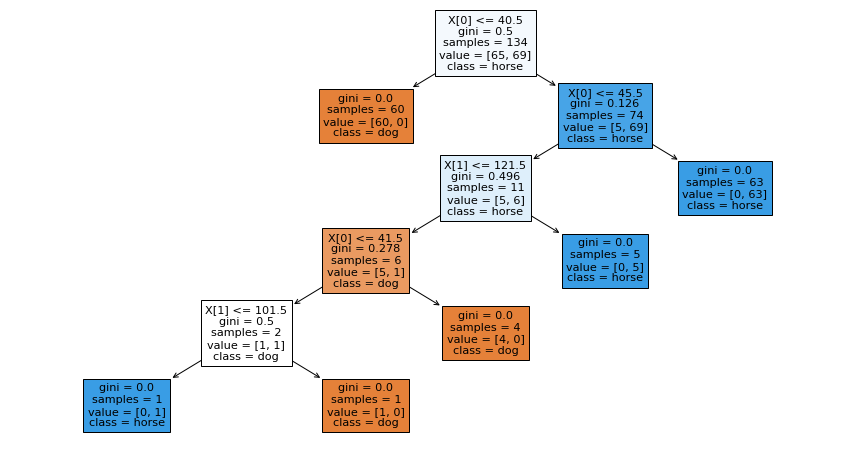

In [ ]:
# plot the tree for this model 
plt.figure(figsize=(15,8))
tree.plot_tree(dt, filled=True, class_names= df.type.unique());

### Improve model using Features Scaling

In [ ]:
# scale features use Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# create a Decision Tree Classifier and fit with train
dt2 = DecisionTreeClassifier()
dt2.fit(X_scaled, y_train)
dt2.score(X_scaled, y_train)

1.0

In [ ]:
# Classification report for train data
print(classification_report(y_train, dt2.predict(X_scaled)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       1.00      1.00      1.00        69

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



In [ ]:
# Classification report for test data
print(classification_report(y_test, dt2.predict(X_test_scaled)))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        35
         1.0       1.00      0.94      0.97        31

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



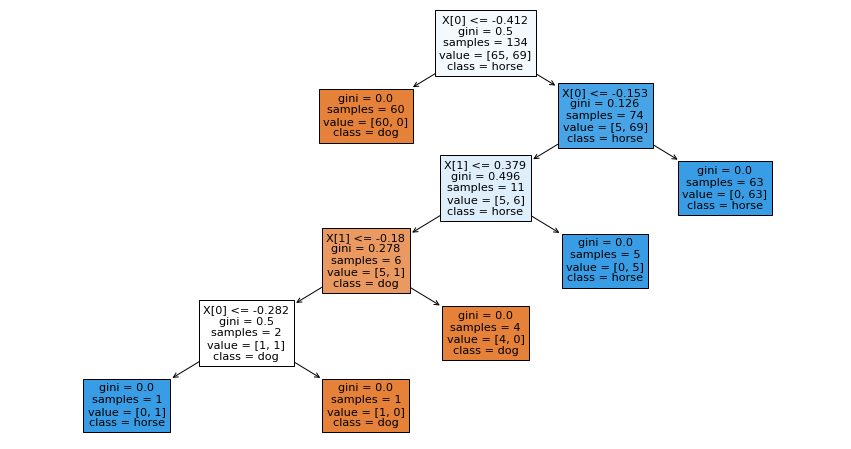

In [ ]:
# plot the tree for model
plt.figure(figsize=(15,8))
tree.plot_tree(dt2, filled=True, class_names=df.type.unique());

### Improve model using GridSearchCV

In [ ]:
# create a dict of Decision Tree parameters 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20],
    'max_features': ['auto', 'sqrt', 'log2']

}

# create Grid Search Cross object
clf = GridSearchCV(dt, param_grid, cv=3)
clf.fit(X_train, y_train) # fit model
clf.score(X_train, y_train) # calculate score

1.0

In [ ]:
# print the best parameters for model
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}

In [ ]:
# Classification report for train data
print(classification_report(y_train, clf.best_estimator_.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       1.00      1.00      1.00        69

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



In [ ]:
# Classification report for test data
print(classification_report(y_test, clf.best_estimator_.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        35
         1.0       1.00      0.94      0.97        31

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



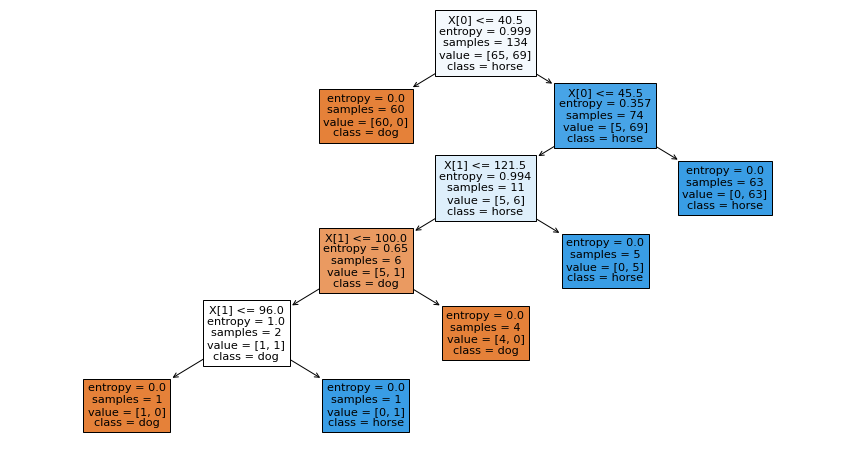

In [ ]:
# plot tree for model
plt.figure(figsize=(15,8))
tree.plot_tree(clf.best_estimator_, filled=True, class_names= df.type.unique()) ;

### **Finally,**
Based on the above results, we can summarize these:
1. There is a clear relation between height and weight (that's separating data into two groups).
2. The size of data affects the final results. 
3. Used improvement techniques in this data has improved the result a bit.